In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('/content/Cleaned_Superstore_Sales_Data.csv')
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Order Year,Order Month
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.960,2017,11
1,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2017,6
2,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.368,2016,10
3,6,CA-2015-115812,2015-06-09,2015-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.860,2015,6
4,7,CA-2015-115812,2015-06-09,2015-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.280,2015,6


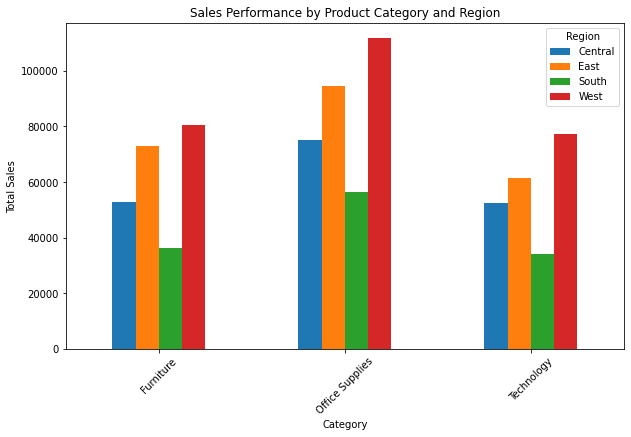

In [ ]:
# Analyze the impact of product category and region on sales performance
category_region_sales = data.groupby(["Category", "Region"])['Sales'].sum().unstack()
category_region_sales.plot(kind='bar', figsize=(10, 6))
plt.title("Sales Performance by Product Category and Region")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.legend(title="Region")
plt.show()


### Analysis of the Chart:
Title: Top-Selling Product Categories by Region

Axes:
X-Axis (Categories): Furniture, Office Supplies, Technology
Y-Axis: Sales

Analysis:
- Office Supplies is the best-selling category overall, especially in the West region.

- The West region has the highest sales across all categories compared to other regions.

- Technology has the lowest sales in the South region, indicating less popularity in that area.

- The Central region has balanced sales but remains lower than the East and West regions across all categories.

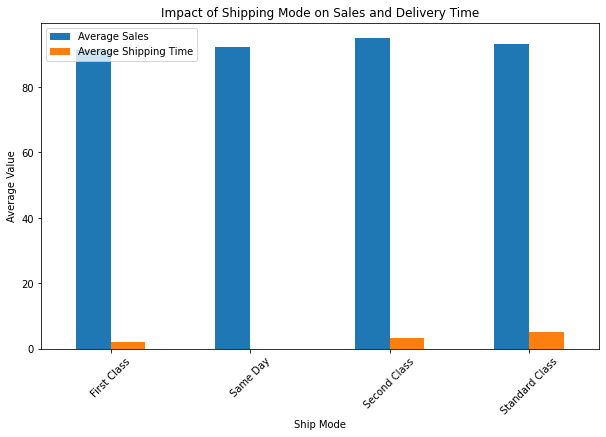

In [ ]:
# Analyze the impact of shipping mode on sales and delivery time
data['Shipping Time'] = (pd.to_datetime(data['Ship Date']) - pd.to_datetime(data['Order Date'])).dt.days
shipping_sales = data.groupby("Ship Mode")[['Sales', 'Shipping Time']].mean()
shipping_sales.plot(kind='bar', figsize=(10, 6))
plt.title("Impact of Shipping Mode on Sales and Delivery Time")
plt.ylabel("Average Value")
plt.xticks(rotation=45)
plt.legend(["Average Sales", "Average Shipping Time"], loc='upper left')
plt.show()


### Analysis of the Chart:
Title: Impact of Shipping Mode on Sales and Delivery Time

Axes:
X-Axis (Ship Mode): First Class, Same Day, Second Class, Standard Class
Y-Axis: Average Value (representing sales and shipping time)

Analysis:
1. Sales Across Shipping Modes:

- Sales are relatively high and consistent across all shipping modes, with Second Class having slightly the highest average sales.
- The Same Day shipping mode also shows strong sales, likely due to customer preference for fast delivery.

2. Shipping Time Across Modes:

- First Class and Same Day have the shortest delivery times.
- Second Class and Standard Class have slightly longer shipping times, with Standard Class taking the longest.

3. Business Implications:

- Customers tend to spend more regardless of shipping mode, but offering fast delivery options (Same Day & First Class) could help attract more purchases.
- Businesses should optimize inventory management to reduce shipping times in Second Class and Standard Class to enhance customer satisfaction.

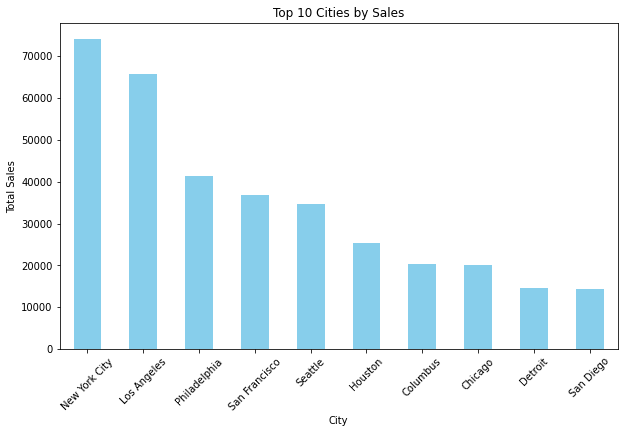

In [ ]:
# Identify the cities with the highest sales
top_cities = data.groupby("City")["Sales"].sum().nlargest(10)
top_cities.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title("Top 10 Cities by Sales")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()

### Analysis of the Chart:
Title: Top 10 Cities by Sales

Axes:
X-Axis (City): Lists the top 10 cities with the highest sales.
Y-Axis (Total Sales): Represents the total sales volume in each city.

Analysis:
1. New York City Leads in Sales:

- New York City has the highest sales, surpassing $70,000, making it the most significant market.
- This suggests a strong customer base and high demand for products.

2. Los Angeles Follows Closely:

- Los Angeles is the second-highest city, with sales exceeding $65,000.
- It indicates that both NYC and LA are the primary revenue contributors.

3. Philadelphia, San Francisco, and Seattle Have Moderate Sales:

- These three cities show sales in the range of $35,000–$42,000, making them secondary strong markets.
- Growth strategies in these cities could further enhance revenue.

4. Lower Sales in Columbus, Chicago, Detroit, and San Diego:

- These cities have relatively lower sales, around $12,000–$20,000.
- Targeted marketing or better distribution strategies could help improve sales in these regions.

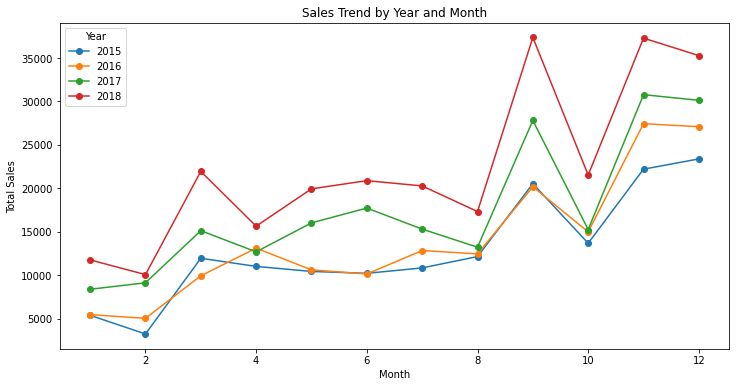

In [ ]:
# Analyze sales trends by year and month
sales_trend = data.groupby(["Order Year", "Order Month"])['Sales'].sum().unstack()
sales_trend.T.plot(figsize=(12, 6), marker='o')
plt.title("Sales Trend by Year and Month")
plt.ylabel("Total Sales")
plt.xlabel("Month")
plt.legend(title="Year")
plt.show()

### Analysis of Sales Trend by Year and Month
Title: Sales Trend by Year and Month

Axes:
X-Axis (Month): Represents months from January (1) to December (12).
Y-Axis (Total Sales): Displays total sales for each month.
Legend: Differentiates sales trends for the years 2015, 2016, 2017, and 2018.

Analysis:
1. Overall Growth in Sales:

- Sales have shown an increasing trend over the years, with 2018 consistently outperforming previous years.
- This suggests a positive business expansion or improved market reach.

2. Seasonal Pattern Observed:

- Sales start low in the first quarter (January–March) and gradually rise towards mid-year.
- A significant peak appears in September and December, indicating a seasonal demand (possibly due to holidays, promotions, or business cycles).

3. 2018 Had the Highest Growth:

- The sharpest spike occurs in September 2018, where sales exceed 35,000 units, significantly higher than other years.
- This suggests a strong business strategy, successful marketing campaigns, or external factors boosting sales.

4. Dip in October, Followed by a Strong Finish in Q4:

- A notable dip in October across all years suggests a temporary slowdown.
- However, sales rebound in November and December, confirming strong end-of-year performance.

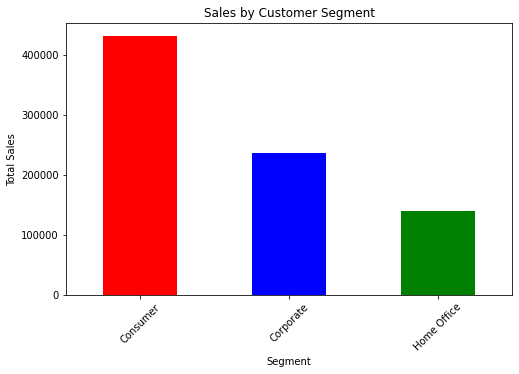

In [ ]:
# Examine the relationship between customer segment and sales
segment_sales = data.groupby("Segment")["Sales"].sum().sort_values(ascending=False)
segment_sales.plot(kind='bar', figsize=(8, 5), color=['red', 'blue', 'green'])
plt.title("Sales by Customer Segment")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()


### Analysis of Sales by Customer Segment
Title: Sales by Customer Segment

Axes:
X-Axis (Segment): Represents different customer segments (Consumer, Corporate, Home Office).
Y-Axis (Total Sales): Displays total sales for each segment.

Analysis:
1. Consumer Segment Dominates:

- The Consumer segment has the highest sales, exceeding 400,000 units, significantly more than other segments.
- This suggests that individual customers drive the majority of business revenue.

2. Corporate Segment is in Second Place:

- Corporate sales are around 225,000 units, indicating strong B2B sales but significantly lower than the Consumer segment.
- This may suggest opportunities to expand corporate offerings or bulk deals.

3. Home Office Segment is the Smallest:

- Home Office sales are the lowest, around 125,000 units.
- This may indicate a niche market or fewer customers purchasing for home office use.

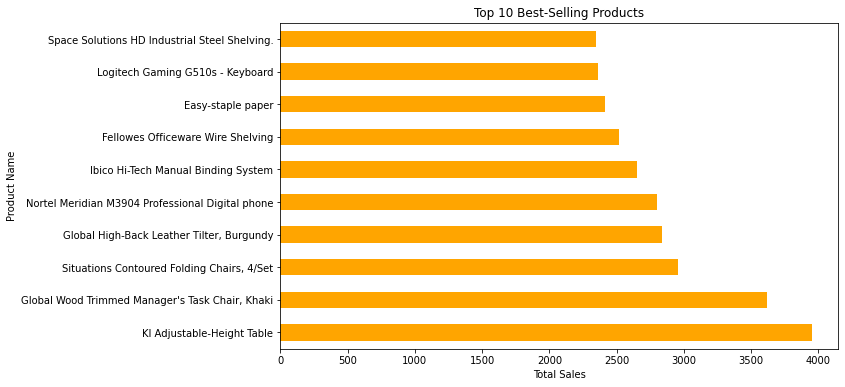

In [ ]:
# Identify the top-selling products
top_products = data.groupby("Product Name")["Sales"].sum().nlargest(10)
top_products.plot(kind='barh', figsize=(10, 6), color='orange')
plt.title("Top 10 Best-Selling Products")
plt.xlabel("Total Sales")
plt.show()

### Analysis of Top 10 Best-Selling Products
Title: Top 10 Best-Selling Products

Axes:
X-Axis (Total Sales): Represents the number of sales for each product.
Y-Axis (Product Name): Lists the top 10 best-selling products.

Analysis:
1. Top-Selling Product:

- KI Adjustable-Height Table has the highest sales, exceeding 4,000 units, making it the most popular product.

2. Strong Sales for Office Furniture:

- Global Wood Trimmed Manager's Task Chair and Situations Contoured Folding Chairs also show high sales, emphasizing demand for office furniture.
- This suggests a strong market for workplace essentials.

3. Balanced Distribution of Sales:

- While some products significantly outperform others, the sales figures for most top-selling products remain competitive.
- Paper, shelving, and keyboards also appear in the top 10, indicating diverse customer needs.